In [210]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 
import pandas as pd 
import math
import warnings
warnings.filterwarnings('ignore') 

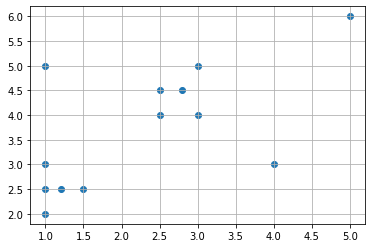

In [211]:
x = [1,3,2.5,1.5,3,2.8,2.5,1.2,1,1,1,5,4]
y = [2,4,4,2.5,5,4.5,4.5,2.5,3,5,2.5,6,3]
plt.scatter(x,y)
plt.grid()
plt.show()

In [212]:
arr=np.array([x,y])
arr=np.transpose(arr)
arr

array([[1. , 2. ],
       [3. , 4. ],
       [2.5, 4. ],
       [1.5, 2.5],
       [3. , 5. ],
       [2.8, 4.5],
       [2.5, 4.5],
       [1.2, 2.5],
       [1. , 3. ],
       [1. , 5. ],
       [1. , 2.5],
       [5. , 6. ],
       [4. , 3. ]])

In [213]:
def get_length(point,arr):
    lengths=[]
    for i in range(len(arr)):
        L=math.dist(point,arr[i])
        lengths.append(L)
    return lengths
        
        

In [214]:
def get_neighbours(point,lengths,eps):
    neighbours=[]
    for i in range(len(lengths)):
        if (lengths[i]<=eps) and (lengths[i]!=0):
            neighbours.append(arr[i])

    return np.array(neighbours)
            
            
        
    

In [215]:
def get_all_neighours(arr,eps):
    all_neighbours=[]
    for i in range(len(arr)):
        l=get_length(arr[i],arr)
        n=get_neighbours(arr[i],l,eps)
        all_neighbours.append(n)
    return np.array(all_neighbours)
        
    

In [216]:
n=get_all_neighours(arr,.6)

In [217]:
n

array([array([[1.2, 2.5],
       [1. , 2.5]]),
       array([[2.5, 4. ],
       [2.8, 4.5]]),
       array([[3. , 4. ],
       [2.8, 4.5],
       [2.5, 4.5]]),
       array([[1.2, 2.5],
       [1. , 2.5]]), array([[2.8, 4.5]]),
       array([[3. , 4. ],
       [2.5, 4. ],
       [3. , 5. ],
       [2.5, 4.5]]),
       array([[2.5, 4. ],
       [2.8, 4.5]]),
       array([[1. , 2. ],
       [1.5, 2.5],
       [1. , 3. ],
       [1. , 2.5]]),
       array([[1.2, 2.5],
       [1. , 2.5]]), array([], dtype=float64),
       array([[1. , 2. ],
       [1.5, 2.5],
       [1.2, 2.5],
       [1. , 3. ]]),
       array([], dtype=float64), array([], dtype=float64)], dtype=object)

In [218]:
n[0]

array([[1.2, 2.5],
       [1. , 2.5]])

In [219]:
def DBS(arr,eps,min_p):
    neighbours = get_all_neighours(arr,eps)
    clusters=[]
    borders=[]
    index_cores=[]
    # core point
    cores=[]
    for i in range(len(neighbours)):
        if len(neighbours[i]) >= min_p:          # check the minimum points 
            cores.append(arr[i])                 # add the point to the cores list  
            index_cores.append(i)                # add the index of the core point 
            clusters.append(neighbours[i])
    
    
    taken_index=[]
    for c in range(len(cores)):
        for n in range(len(neighbours)):
            for neigh in neighbours[n]:
                if (n in index_cores):          # check if the index of the point in index of cores or not
                    break
                if (n in taken_index):          # check if the index of the point in index of taken points or not
                    break
                if (cores[c]==neigh).all():
                    clusters[c]=list(clusters[c])
                    clusters[c].append(arr[n])       # add the point as a border point to the class
                    clusters[c]=np.array(clusters[c])
                    taken_index.append(n)            # add the point to taken points list  
                    break
    outliers=[]
    for i in range(len(arr)):
        if i not in taken_index and i not in index_cores:

            outliers.append(arr[i])                  # add the outliers
            
            

            
    for i in range(len(clusters)-1):           # merge the clusters if there's a common point between them
        flag=0
        for c0 in clusters[i]:
            if flag!=0:                      # flag to get out of the two loops
                flag=1
                break
            for c1 in clusters[i+1]:
                if (c0==c1).all():
                    c=np.vstack((clusters[i],clusters[i+1]))    # merge two clusters
                    c=np.unique(c,axis=0)                       # take the unique
                    clusters=np.delete(clusters,i+1,axis=0)     # delete the second cluster
                    clusters=np.delete(clusters,i,axis=0)       # delete the first cluster
                    clusters=list(clusters)
                    clusters.append(c)                          # add the new cluster
                    clusters=np.array(clusters)
                    flag=1
                    break  
        # add the core points to the clusters
        clusters[i]=list(clusters[i])
        clusters[i].append(cores[i])
        clusters[i]=np.array(clusters[i])   
        
        
    # remove repeated element
    for i in range(len(clusters)):
        clusters[i]=np.unique(clusters[i],axis=0)
    

    
    



            

    return clusters , outliers
            
    

In [220]:
clusters,outliers=DBS(arr,.6,4)
clusters

array([array([[2.5, 4. ],
       [2.5, 4.5],
       [2.8, 4.5],
       [3. , 4. ],
       [3. , 5. ]]),
       array([[1. , 2. ],
       [1. , 2.5],
       [1. , 3. ],
       [1.2, 2.5],
       [1.5, 2.5]])], dtype=object)

In [221]:
outliers

[array([1., 5.]), array([5., 6.]), array([4., 3.])]

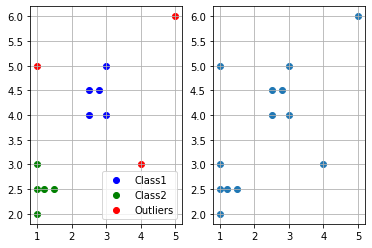

In [238]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter([i[0] for i in clusters[0]], [i[1] for i in clusters[0]],c='b')
ax1.scatter([i[0] for i in clusters[1]], [i[1] for i in clusters[1]],c='g')
ax1.scatter([i[0] for i in outliers], [i[1] for i in outliers],c='r')
ax1.legend(["Class1","Class2","Outliers"],loc='lower right')
ax2.scatter(x,y)
ax1.grid()
ax2.grid()
plt.show()